***INSTALLING***

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install one_hot_encoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install category_encoders 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


***Libraries***

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder

import warnings 
warnings.filterwarnings('ignore')


In [7]:
'''df = pd.read_csv(r'D:\Amit Diploma\AMIT\Sources\DS\courses\titanic.csv')
or change slashes 
df = pd.read_csv('D:/Amit Diploma/AMIT/Sources/DS/courses/titanic.csv')'''


"df = pd.read_csv(r'D:\\Amit Diploma\\AMIT\\Sources\\DS\\courses\titanic.csv')\nor change slashes \ndf = pd.read_csv('D:/Amit Diploma/AMIT/Sources/DS/courses/titanic.csv')"

***READ_DATA***

In [8]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import read_data
df = read_data('titanic.csv')

ModuleNotFoundError: No module named 'Sources'

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
'''df = pd.read_csv('titanic.csv')
df.head()'''

"df = pd.read_csv('titanic.csv')\ndf.head()"

***DROP NOT IMPORTANT FEATURES***

In [ ]:
#id , ticket not imp
df.drop(['PassengerId','Name' ,'Ticket'], axis=1 , inplace=True)

***CHECK_TYPES***

In [ ]:
'''dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({'Dtypes': dtypes, 'Num_unique' : n_uniq})
pd.DataFrame({'Dtypes': dtypes, 'Num_unique' : n_uniq}).T'''

"dtypes = df.dtypes\nn_uniq = df.nunique()\npd.DataFrame({'Dtypes': dtypes, 'Num_unique' : n_uniq})\npd.DataFrame({'Dtypes': dtypes, 'Num_unique' : n_uniq}).T"

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import check_types
check_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_unique,2,3,2,88,7,7,248,147,3


**small num --> category**

**big num --> numerical**

**So, (Survived , Pclass , Sex , Embarked , SibSp , Parch) ---> not numerical --> category**

In [ ]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
df[cols] = df[cols].astype('category')
check_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
Num_unique,2,3,2,88,7,7,248,147,3


***CHECK_NULLS***

In [ ]:
'''null = df.isnull().sum()
ratio = (null/df.shape[0])*100 
pd.DataFrame({'Null_Sum': null, 'Ratio': ratio}).T'''

"null = df.isnull().sum()\nratio = (null/df.shape[0])*100 \npd.DataFrame({'Null_Sum': null, 'Ratio': ratio}).T"

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import check_nulls
check_nulls(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_Sum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


**if small number of Nulls --> drop them** 

**if not --> replace them by mean or median ( if we have outliers )**

**if huge --> drop col**

In [ ]:
#df = df.dropna(subset=['Embarked'], inplace = True)
#df = pd.read_csv('titanic.csv')

In [ ]:
#df = df.drop('Cabin' , axis = 1 , inplace = True)
#df = pd.read_csv('titanic.csv')

In [ ]:
df1 = df.dropna(subset=["Embarked"], inplace= True)
df2 = df.drop("Cabin", axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
median = df['Age'].median()
df['Age'].fillna(median, inplace = True)
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

***CHECK_DUPLICATED***

In [ ]:
'''df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.head|()'''

'df.duplicated().sum()\ndf.drop_duplicates(inplace=True)\ndf.duplicated().sum()\ndf.head|()'

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import check_duplicated
check_duplicated(df)

Before removing duplicated rows:
Duplicated rows count: 116
Total rows: 889

After removing duplicated rows:
Duplicated rows count: 0
Total rows: 773


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


***CHECK_OUTLIERS***

In [ ]:
'''#check outliers
num_cols = df.select_dtypes('number').columns
num_cols'''

"#check outliers\nnum_cols = df.select_dtypes('number').columns\nnum_cols"

In [ ]:
'''plt.figure(figsize = (8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f'{col} Boxplot')'''

"plt.figure(figsize = (8,1))\nfor i , col in enumerate(num_cols):\n    plt.subplot(1,2,i+1)\n    sns.boxplot(df[col], orient='h')\n    plt.title(f'{col} Boxplot')"

In [ ]:
'''for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR 

    lower_outliers = df[df[col] < lower_fence][col].values
    upper_outliers = df[df[col] > upper_fence][col].values

    df[col].replace(lower_outliers, lower_fence, inplace = True)
    df[col].replace(upper_outliers, upper_fence, inplace = True)'''

'for col in num_cols:\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_fence = Q1 - 1.5*IQR\n    upper_fence = Q3 + 1.5*IQR \n\n    lower_outliers = df[df[col] < lower_fence][col].values\n    upper_outliers = df[df[col] > upper_fence][col].values\n\n    df[col].replace(lower_outliers, lower_fence, inplace = True)\n    df[col].replace(upper_outliers, upper_fence, inplace = True)'

In [ ]:
'''plt.figure(figsize = (8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f'{col} Boxplot')'''

"plt.figure(figsize = (8,1))\nfor i , col in enumerate(num_cols):\n    plt.subplot(1,2,i+1)\n    sns.boxplot(df[col], orient='h')\n    plt.title(f'{col} Boxplot')"

Numeric columns: ['Age', 'Fare']
Plotting before handling outliers...
Plotting before boxplot for column: Age
Plotting before boxplot for column: Fare


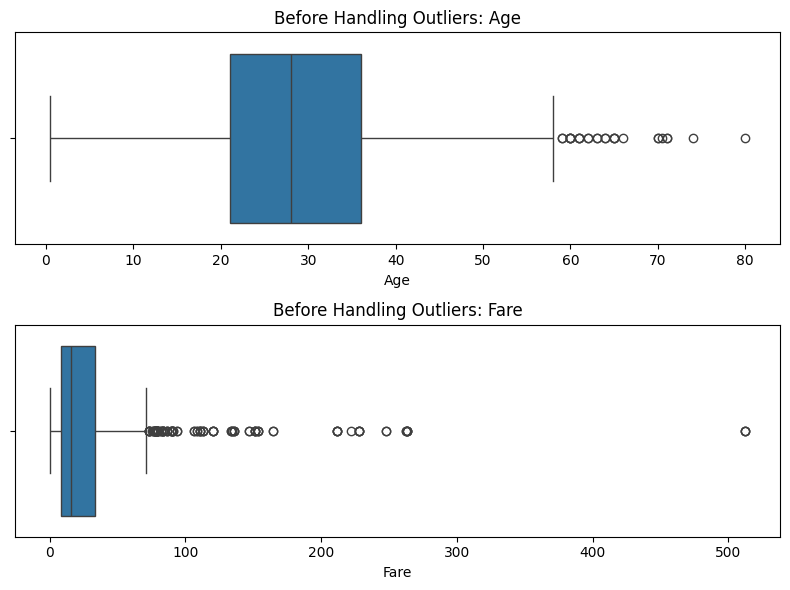

Plotting after handling outliers...
Plotting after boxplot for column: Age
Plotting after boxplot for column: Fare


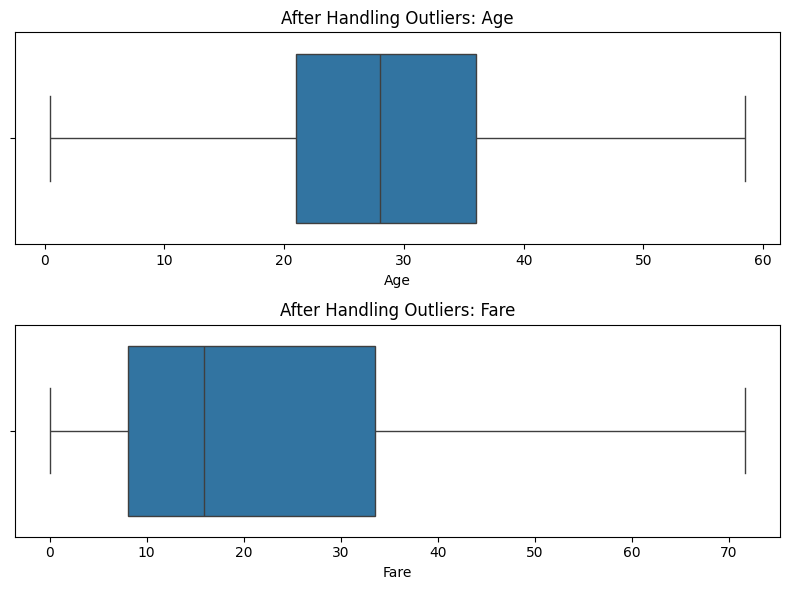

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import check_outliers
check_outliers(df)

***VISUALIZATION***

Histogram & KDE plt for numercial cols

In [ ]:
'''plt.figure(figsize = (9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col], edgecolor='black')
    plt.title(f'{col} histogram')'''

"plt.figure(figsize = (9,2))\nfor i , col in enumerate(num_cols):\n    plt.subplot(1,2,i+1)\n    plt.hist(df[col], edgecolor='black')\n    plt.title(f'{col} histogram')"

In [ ]:
'''plt.figure(figsize = (9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f'{col} KDE')'''

"plt.figure(figsize = (9,2))\nfor i , col in enumerate(num_cols):\n    plt.subplot(1,2,i+1)\n    sns.kdeplot(df[col])\n    plt.title(f'{col} KDE')"

**Categorical features visualization**

**univariate --> عمود مع نفسه مثلا عدد الذكور و النساء ف عمود الgender**

**bivariate --> علاقه بين الذكوv و النساء و بين الناس اللي نجت**

**multivariate --> علاقه بين اكثر من عمود|**

**Count Plot**

In [ ]:
'''cat_cols = df.select_dtypes('category').columns
plt.figure(figsize = (14,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, data = df )
    plt.title(f'{col} Distribution Count plot')
plt.subplots_adjust(hspace= 0.8, wspace=0.3)
plt.show()'''

"cat_cols = df.select_dtypes('category').columns\nplt.figure(figsize = (14,4))\nfor i , col in enumerate(cat_cols):\n    plt.subplot(2,3,i+1)\n    sns.countplot(x = col, data = df )\n    plt.title(f'{col} Distribution Count plot')\nplt.subplots_adjust(hspace= 0.8, wspace=0.3)\nplt.show()"

**PIE plot**

In [ ]:
'''unique = df[col].value_counts() 
count = unique.values
print(unique)
print(count)'''

'unique = df[col].value_counts() \ncount = unique.values\nprint(unique)\nprint(count)'

In [ ]:
'''plt.figure(figsize = (9,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie( count , labels=categories, startangle=140, autopct='%1.1d%%')
    plt.title(f'{col} Pie plot')
plt.subplots_adjust(hspace= 0.8, wspace=0.3)
plt.show()'''

"plt.figure(figsize = (9,4))\nfor i , col in enumerate(cat_cols):\n    plt.subplot(2,3,i+1)\n    unique = df[col].value_counts()\n    count = unique.values\n    categories = unique.index\n    plt.pie( count , labels=categories, startangle=140, autopct='%1.1d%%')\n    plt.title(f'{col} Pie plot')\nplt.subplots_adjust(hspace= 0.8, wspace=0.3)\nplt.show()"

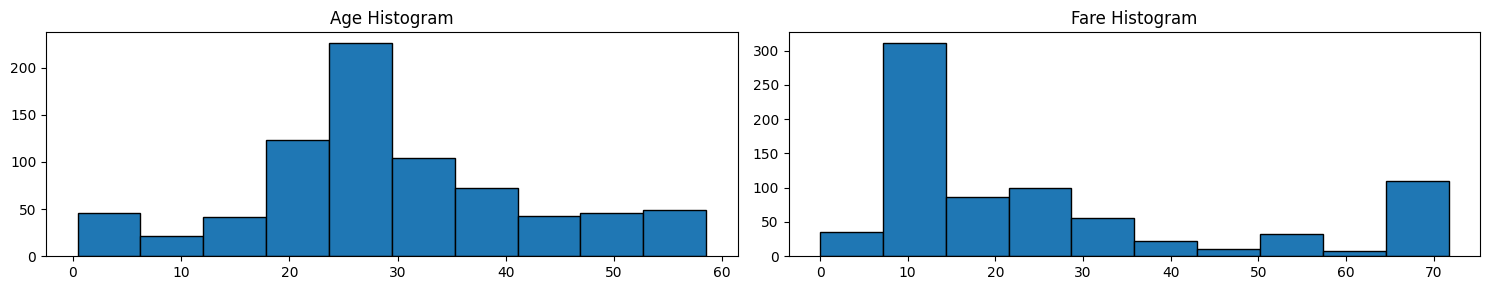

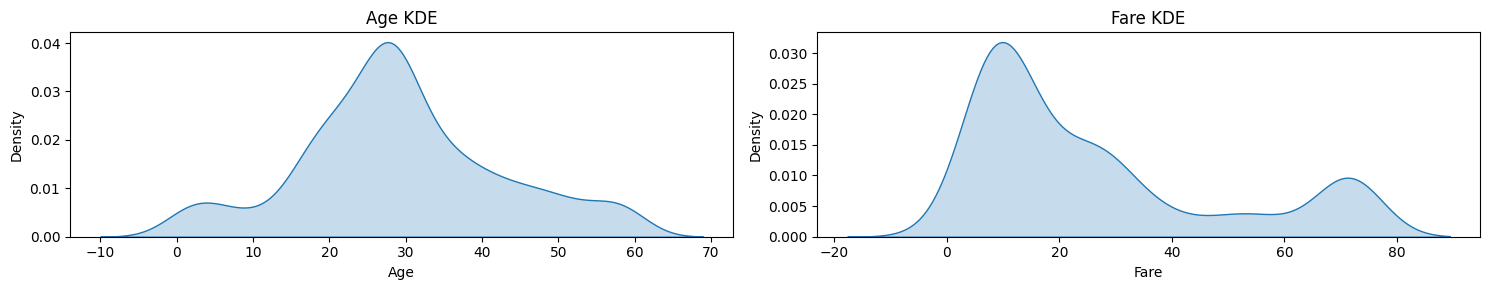

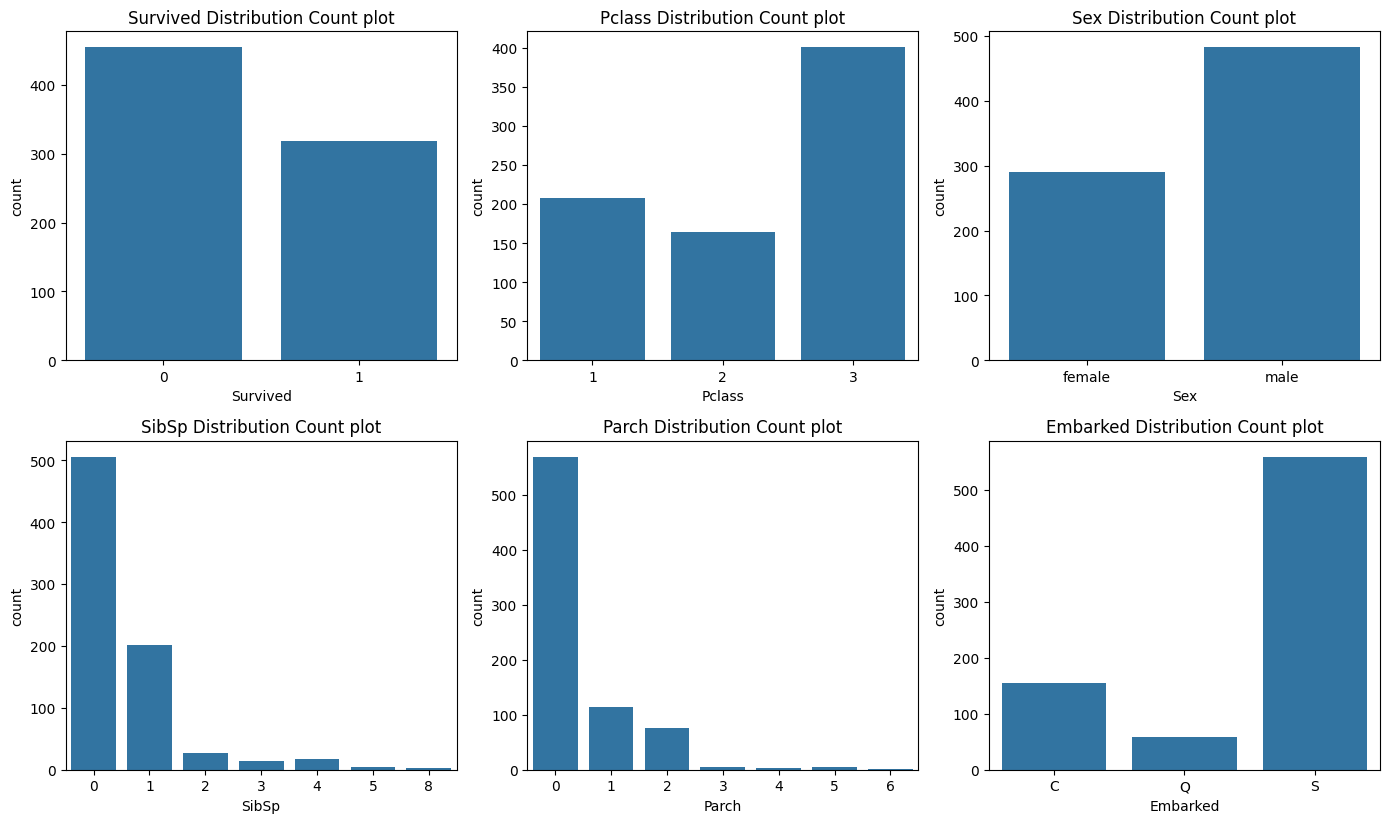

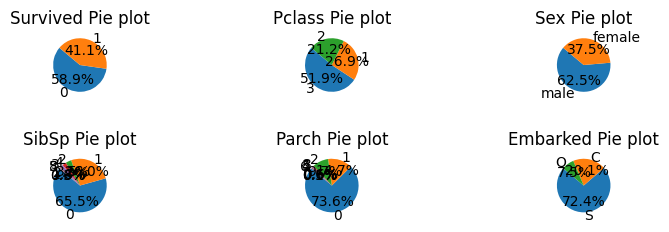

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import visual
visual(df)

**if 2 numerical cols --> scatter, pair, line, heatmap plts**

**if one numercial & one categorical --> barplot**

**if 2 categorical cols --> heatmap**

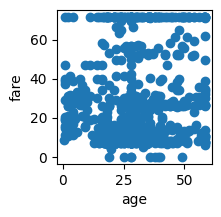

In [ ]:
#2 numerical age & fare
plt.figure(figsize = (2,2))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

**this is a weak relationship**

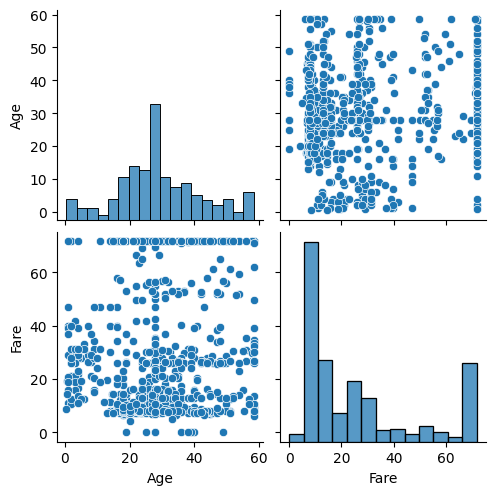

In [ ]:
sns.pairplot(df)

corr = correlation → measures how strongly and in what direction two variables are related.

* **+1** = perfect positive relation
* **-1** = perfect negative relation
* **0** = no linear relation 

<function matplotlib.pyplot.show(close=None, block=None)>

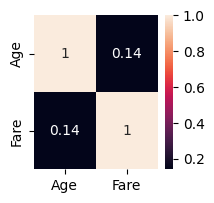

In [ ]:
#heatmap
corr = df[['Age','Fare']].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)
plt.show

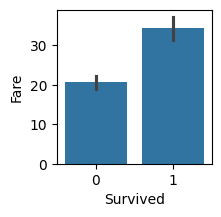

In [ ]:
plt.figure(figsize=(2,2))
sns.barplot(x='Survived', y='Fare', data = df)
plt.show()

In [ ]:
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,379
1,214,104


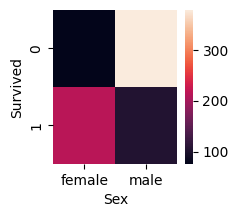

In [ ]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg)
plt.show()

***data set splitting***

In [ ]:
'''x = df.iloc[:,1:]
x.head()'''

'x = df.iloc[:,1:]\nx.head()'

In [ ]:
'''y = df['Survived']
y'''

"y = df['Survived']\ny"

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import split_data
X, y = split_data(df, 'Survived')

X values:
  Pclass     Sex   Age SibSp Parch     Fare Embarked
0      3    male  22.0     1     0   7.2500        S
1      1  female  38.0     1     0  71.2833        C
2      3  female  26.0     0     0   7.9250        S
3      1  female  35.0     1     0  53.1000        S
4      3    male  35.0     0     0   8.0500        S

 Y values:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]


***Scaling , Normalization***

In [ ]:
'''#create an instance from the class
scaler = MinMaxScaler()'''

'#create an instance from the class\nscaler = MinMaxScaler()'

In [ ]:
'''num_cols = x.select_dtypes('number').columns'''

"num_cols = x.select_dtypes('number').columns"

In [ ]:
'''scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])
x.head()'''

'scaler.fit(x[num_cols])\nx[num_cols] = scaler.transform(x[num_cols])\nx.head()'

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import scale_columns
df_scaled = scale_columns(df, ['Age', 'Fare'])

Before scaling:
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

After scaling:
        Age      Fare
0  0.371556  0.101151
1  0.647039  0.994535
2  0.440427  0.110569
3  0.595386  0.740844
4  0.595386  0.112313


***Encoding***

**Nominal** : الترتيب مش مهم

**Ordinal** : الترتيب مهم جدا 

**Ordinal Encoding or Label Encoding**

**One hot Encoding**

**Binary Encoding**

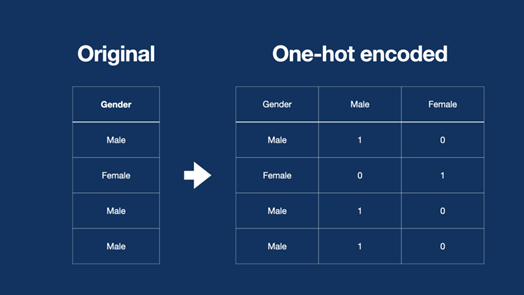

**label encoding**

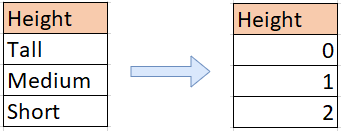

**Class weighted**
**label encoding disadvantegs and sols**

In [ ]:
'''str_col = ['Sex', 'Embarked']
pd.DataFrame(x[str_col].nunique()).T'''

"str_col = ['Sex', 'Embarked']\npd.DataFrame(x[str_col].nunique()).T"

In [ ]:
'''encoder = OneHotEncoder(cols = str_col, drop_invariant=True)
x = encoder.fit_transform(x)
x.head()'''

'encoder = OneHotEncoder(cols = str_col, drop_invariant=True)\nx = encoder.fit_transform(x)\nx.head()'

In [ ]:
from Sources.DS.courses.Preprocessing.Titanic.my_preprocessing import encode_columns
df_encoded = encode_columns(df, ['Sex', 'Embarked'], encoding_type='OneHotEncoding')

Before encoding:
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S

After encoding:
  Survived Pclass  Sex_male  Sex_female   Age SibSp Parch     Fare  \
0        0      3         1           0  22.0     1     0   7.2500   
1        1      1         0           1  38.0     1     0  71.2833   
2        1      3         0           1  26.0     0     0   7.9250   
3        1      1         0           1  35.0     1     0  53.1000   
4        0      3         1           0  35.0     0     0   8.0500   

   Embarked_S  Embarked_C  Embarked_Q  
0           1           0           0  
1           0           1           0  
2           1           0           0  
3           1           0           0  
4           1           0           0  


In [ ]:
df_encoded = encode_columns(df, ['Sex', 'Embarked'], encoding_type='label')

Before encoding:
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S

After encoding:
  Survived Pclass  Sex   Age SibSp Parch     Fare  Embarked
0        0      3    1  22.0     1     0   7.2500         1
1        1      1    2  38.0     1     0  71.2833         2
2        1      3    2  26.0     0     0   7.9250         1
3        1      1    2  35.0     1     0  53.1000         1
4        0      3    1  35.0     0     0   8.0500         1
